<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="cognitiveclass.ai logo">
</center>


# **Categorical Cross-Entropy Loss**


Estimated time needed: **45** minutes


In this lab, we are going to use the MNIST hand-written digits dataset as a motivating example to understand categorical cross-entropy loss.


<h1> House Number Detection </h1></s>

You have been tasked with building a model that can recognize house numbers from arbitrary street-view images. You are given a set of images of single-digit house numbers engraved into slates or wall surfaces. The images vary in size and color. In this lab, we are going to use the MNIST hand-written digits dataset as a motivating example to understand the __softmax function__, __one-hot encoding__, and __categorical cross-entropy loss__. The MNIST hand-written dataset has 10 classes, each representing a digit from 0-9. We will attempt to build a multi-class classification model that will identify which digit is present in the image. 


<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML311-Coursera/labs/Module3/L1/house_number.jpg" style="width: 30%">

<!-- Original Source: https://slate.com/human-interest/2020/06/a-quest-to-catalogue-every-single-house-number-in-one-suburban-zip-code.html --> 


## **Table of Contents**

<ol>
    <li><a href="https://#Objectives">Objectives</a></li>
    <li><a href="https://#Datasets">Datasets</a></li>
    <li>
        <a href="https://#Setup">Setup</a>
        <ol>
            <li><a href="https://#Installing-Required-Libraries">Installing Required Libraries</a></li>
            <li><a href="https://#Importing-Required-Libraries">Importing Required Libraries</a></li>
            <li><a href="https://#Defining-Helper-Functions">Defining Helper Functions</a></li>
        </ol>
    </li>
    <li><a href="https://https://#Categorical Cross-Entropy">Categorical Cross-Entropy</a>
        <ol>
            <li><a href="https://#Softmax Activation Function">Softmax Activation Function</a></li>
            <li><a href="https://#One-Hot Encoding">One-Hot Encoding</a></li>
            <li><a href="#Categorical Cross-Entropy">Categorical Cross-Entropy</a></li>
        </ol>
    </li>
    <li><a href="https://#Binary vs. Multi-Class Classification">Binary vs. Multi-Class Classification</a>
        <ol>
            <li><a href="https://#Binary Classification">Binary Classification</a></li>
            <li><a href="https://#Multi-Class Classification">Multi-Class Classification</a></li>
        </ol>
    </li>
    <li>
        <a href="https://#Example: MNIST Hand-Written Digits">Example: MNIST Hand-Written Digits</a> </li>
    <li>
        <a href="https://#Example: Single-Digit House Number Recognition"> Example: Single-Digit House Number Recognition</a> </li>
    <li><a href="https://#Exercises">Exercises</a>
        <ol>
            <li><a href="https://#Exercise 1 - Loading and plotting the images">Exercise 1 - Loading and plotting the images</a></li>
            <li><a href="https://#Exercise 2 - Preparing the data">Exercise 2 - Preparing the data</a></li>
            <li><a href="https://#Exercise 3 - One-hot encoding">Exercise 3 - One-hot encoding</a></li>
            <li><a href="https://#Exercise 4 - Build model architecture">Exercise 4 - Build model architecture</a></li>
            <li><a href="https://#(Optional) Exercise 5 - Sparse Categorical Cross-Entropy">Sparse Categorical Cross-Entropy</a></li>
        </ol>
    </li>
</ol>


## Objectives

After completing this lab you will be able to:

*   **Understand** what categorical cross-entropy is, and how it works with the Softmax activation function.
*   **Build** simple CNN models for binary and multi-class classification.


## Setup


For this lab, we will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.
*   [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for machine learning and machine-learning-pipeline related functions.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for visualizing the data.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for additional plotting tools.
*   [`keras`](https://keras.io/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for loading datasets.


### Importing Required Libraries


In [26]:
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf
import random
from mlxtend.plotting import plot_decision_regions
from PIL import Image
from urllib.request import urlopen
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [8]:
def generate_multiclass_blobs(num_samples_total, training_split, cluster_centers, num_classes, loss_function_used):
    X, targets = make_blobs(n_samples = num_samples_total, centers = cluster_centers, n_features = num_classes, center_box=(0, 1), cluster_std = 1.5)
    categorical_targets = to_categorical(targets)
    X_training = X[training_split:, :]
    X_testing = X[:training_split, :]
    Targets_training = categorical_targets[training_split:]
    Targets_testing = categorical_targets[:training_split].astype(np.int32)
    return X_training, Targets_training, X_testing, Targets_testing


def generate_binary_blobs(num_samples_total, training_split, loss_function_used):
    X, targets = make_blobs(n_samples = num_samples_total, centers = [(0,0), (15,15)], n_features = 2, center_box=(0, 1), cluster_std = 2.5)
    targets[np.where(targets == 0)] = -1
    X_training = X[training_split:, :]
    X_testing = X[:training_split, :]
    Targets_training = targets[training_split:]
    Targets_testing = targets[:training_split]
    return X_training, Targets_training, X_testing, Targets_testing

## Categorical Cross-Entropy


When working on a machine learning problem, we use loss functions to optimize our models during training where a common objective is to minimize the loss function.

Cross-entropy is a widely used loss or cost function, that is used to optimize classification models. Before delving into cross-entropy, let us first cover the prerequisites by learning about a common activation function called Softmax.


### Softmax Activation Function


Activation functions are transformations applied to the output from CNNs before loss computations.


The Softmax activation function is typically placed as the last layer in a neural network and used to normalize the output of a network to a probability distribution over predicted output classes.

It does so by scaling numbers/logits into probabilities for each possible outcome or class present in our dataset. The resulting probabilities in the vector sum up to one.

Mathematically, Softmax is defined as follows:

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML311-Coursera/labs/Module3/L1/softmax.png" style="width: 30%">


Here, $\overrightarrow{{z}}$ is an input vector to the Softmax function $\sigma$.

$\overrightarrow{{z}}\_i$ represents the $i$th element of the input vector, and can take on values from -inf to inf.

$\overrightarrow{{z}}_i$ represents the $i$th element of the input vector, and can take on values from -inf to inf. 

$e^{z_i}$ is a standard exponential function applied on the $i$th element of $z$, and the denominator is a normalizing term (L1-norm) to ensure the result is a valid probability distribution, that is, sums up to 1, and values are within the 0 - 1 range.


Exponential is a steeply increasing function; that is, it increases the difference between outputs. In the final output, the largest element (which dominates the norm) is normalized to a value close to 1, while all the other elements end up being close to 0. Not only does the resulting vector show the winning class, but it also retains the original order of values.


Another important point to note is that Softmax is not affected by negative values, as the exponent of any value is always a positive value.


Let us walk through an example to understand Softmax.


Imagine you are building a CNN model to classify an image as a dog, cat, fish, or horse. The fully-connected layer of your CNN gives a vector of logits. You pass the vector through the Softmax function above to obtain probabilities.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML311-Coursera/labs/Module3/L1/cce_diag.png)


### One-Hot Encoding


The ground truth is typically presented in form of categorical data; that is, a given image is categorized into one of these classes: dog, cat, fish, or horse.


For categorical variables where no ordinal relationships exist, we can perform one-hot encoding to represent each class. This is best explained through an example.

In our case, we will have four classes, and these are the corresponding one-hot encoded labels:


<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML311-Coursera/labs/Module3/L1/ohe_labels.png" style="width: 50%">


So in one-hot encoding, we represent labels with a binary variable where for every given class, we have the value 1 for the position corresponding to that particular class and 0 elsewhere (that is, 100% probability of belonging to that class).


### Back to Categorical Cross-Entropy


Now that we have converted the logits to output probabilities, we need to measure how good they are; that is, measure the distance from the truth values.


For instance, in the example above, the desired output is [1,0,0,0], but the model outputs [0.775,0.116,0.039,0.070].


The categorical cross-entropy is mathematically defined as follows:


<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML311-Coursera/labs/Module3/L1/cce.png" style="width: 30%">


We can use the formula above to compute the cross-entropy loss. When training our model, we iteratively update the weights to minimize the cross-entropy loss. 

The Softmax is continuously differentiable, and this property makes it easy to compute the derivative of the loss function and, accordingly, adjust the model weights in each iteration to minimize the loss function.

In the next iteration, if our $$L\_{CE}$$ is lower than the current one, we say that the model is *learning*.


## Binary vs. Multi-Class Classification


Now, let us do a quick review of binary and multi-class classification. Binary classification tasks require that all examples be assigned to one of two classes, whereas in multi-class classification, examples can belong to more than two classes.

For binary classification problems, we have a final layer with a single node and a sigmoid activation function. It can map the output vector from a CNN to values between 0 and 1 before loss computations. The sigmoid function is denoted using the following formula:

$$\sigma(x) = 1/(1+e^{-x})$$


Let's see binary classification and multi-class classification in action.


### Binary Classification


Using a helper function defined at the beginning of the notebook, we will use the `make_blobs()` function from `sklearn` to generate isotropic Gaussian blobs for classification.

We will create a data set with 1000 samples, and use 750 of those samples for training a simple CNN model.


Let us define a few more configuration options.


Let us define a few more configuration options.


*   **num_samples**: refers to the total number of samples in our dataset
*   **test_split**: refers to the number of samples to be used for testing
*   **cluster_centers**: we define 2 centers for our isotropic Gaussian blobs
*   **num_classes**: we have 2 classes
*   **loss_function_used**: since this is a binary classification problem, we use binary cross-entropy loss


In [12]:
num_samples = 1000
test_split = 250
cluster_centers = [(15, 0), (30, 15)]
num_classes = len(cluster_centers)
loss_function_used = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [13]:
X_train, targets_train, X_test, targets_test = generate_binary_blobs(num_samples, test_split, loss_function_used)

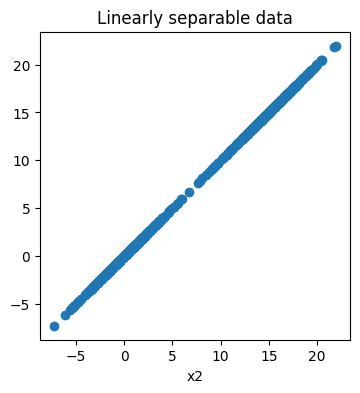

In [14]:
plt.figure(figsize=(4, 4))
plt.scatter(X_train[:, 0], X_train[:, 0])
plt.title("Linearly separable data")
plt.xlabel("x1")
plt.xlabel("x2")
plt.show()

We will build a simple CNN model with two hidden layers, that uses sigmoid as the activation function, and binary cross-entropy as the loss function. Let's define the architecture of our model:


In [17]:
feature_vector_shape = X_train.shape[1]
input_shape = (feature_vector_shape, )

In [18]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(12, input_shape=input_shape, activation='relu', kernel_initializer='he_uniform'),
    tf.keras.layers.Dense(8, activation='relu', kernel_initializer='he_uniform'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

/home/mbarbaric/dev/ai_projects/IBM_Machine_Learning_Course/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.compile(loss=loss_function_used, optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])
model.fit(X_train, targets_train, epochs=30, batch_size=5, verbose=1, validation_split=0.2)

Epoch 1/30


/home/mbarbaric/dev/ai_projects/IBM_Machine_Learning_Course/.venv/lib/python3.10/site-packages/keras/src/backend/tensorflow/nn.py:674: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4470 - loss: -3.8786 - val_accuracy: 0.4067 - val_loss: -60.5841
Epoch 2/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4542 - loss: -132.8311 - val_accuracy: 0.4533 - val_loss: -645.0687
Epoch 3/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5006 - loss: -875.3995 - val_accuracy: 0.4267 - val_loss: -2420.1116
Epoch 4/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5035 - loss: -2721.3474 - val_accuracy: 0.4000 - val_loss: -6225.3936
Epoch 5/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4535 - loss: -6814.4360 - val_accuracy: 0.4200 - val_loss: -12696.2021
Epoch 6/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4787 - loss: -11787.0605 - val_accuracy: 0.4200 - val_loss: -22391.9648
Epoch 7/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5081 - loss: -22235.7129 - val_accuracy: 0.4533 - val_loss: -35918.9414
Epoch 8/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy

We will now use the trained model to make predictions on an unseen test dataset.


In [23]:
test_results = model.evaluate(X_test, targets_test)
print(f"Test results - loss: {test_results[0]} - Accuracy: {test_results[1] * 100}%")

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4721 - loss: -1695870.7500 
Test results - loss: -1689143.125 - Accuracy: 49.59999918937683%


In [28]:
plot_decision_regions(X_test, targets_test, clf=model, legend=2)
plt.figure(figsize=(4, 4))
plt.show()

NameError: name 'Targets_test' is not defined